In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing stock file

df = pd.read_csv("/Users/brilla/Documents/CodeRoom/AIMLDL/STOCK PRICE PREDICTION/TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010/06/29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010/06/30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010/07/01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010/07/02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010/07/06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
df.shape

(2416, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


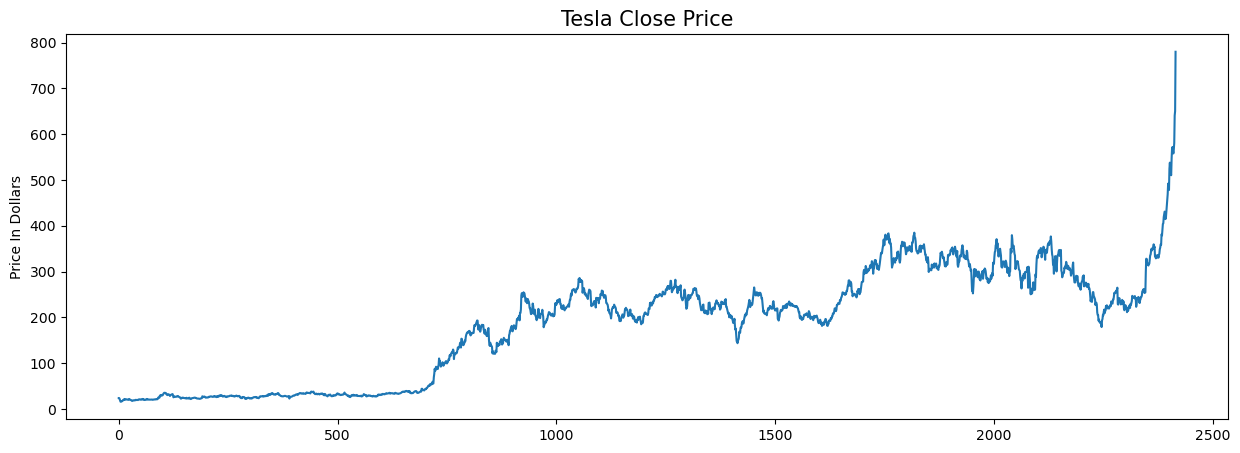

In [6]:
# Exploratory data analysis

plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close Price', fontsize=15)
plt.ylabel('Price In Dollars')
plt.show()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010/06/29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010/06/30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010/07/01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010/07/02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010/07/06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [8]:
# Comparing if they are the same
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

In [9]:
# delete 'Adj Close' from TSLA
df = df.drop(['Adj Close'], axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2010/06/29,19.000000,25.00,17.540001,23.889999,18766300
1,2010/06/30,25.790001,30.42,23.299999,23.830000,17187100
2,2010/07/01,25.000000,25.92,20.270000,21.959999,8218800
3,2010/07/02,23.000000,23.10,18.709999,19.200001,5139800
4,2010/07/06,20.000000,20.00,15.830000,16.110001,6866900


In [10]:
# Checking for null values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

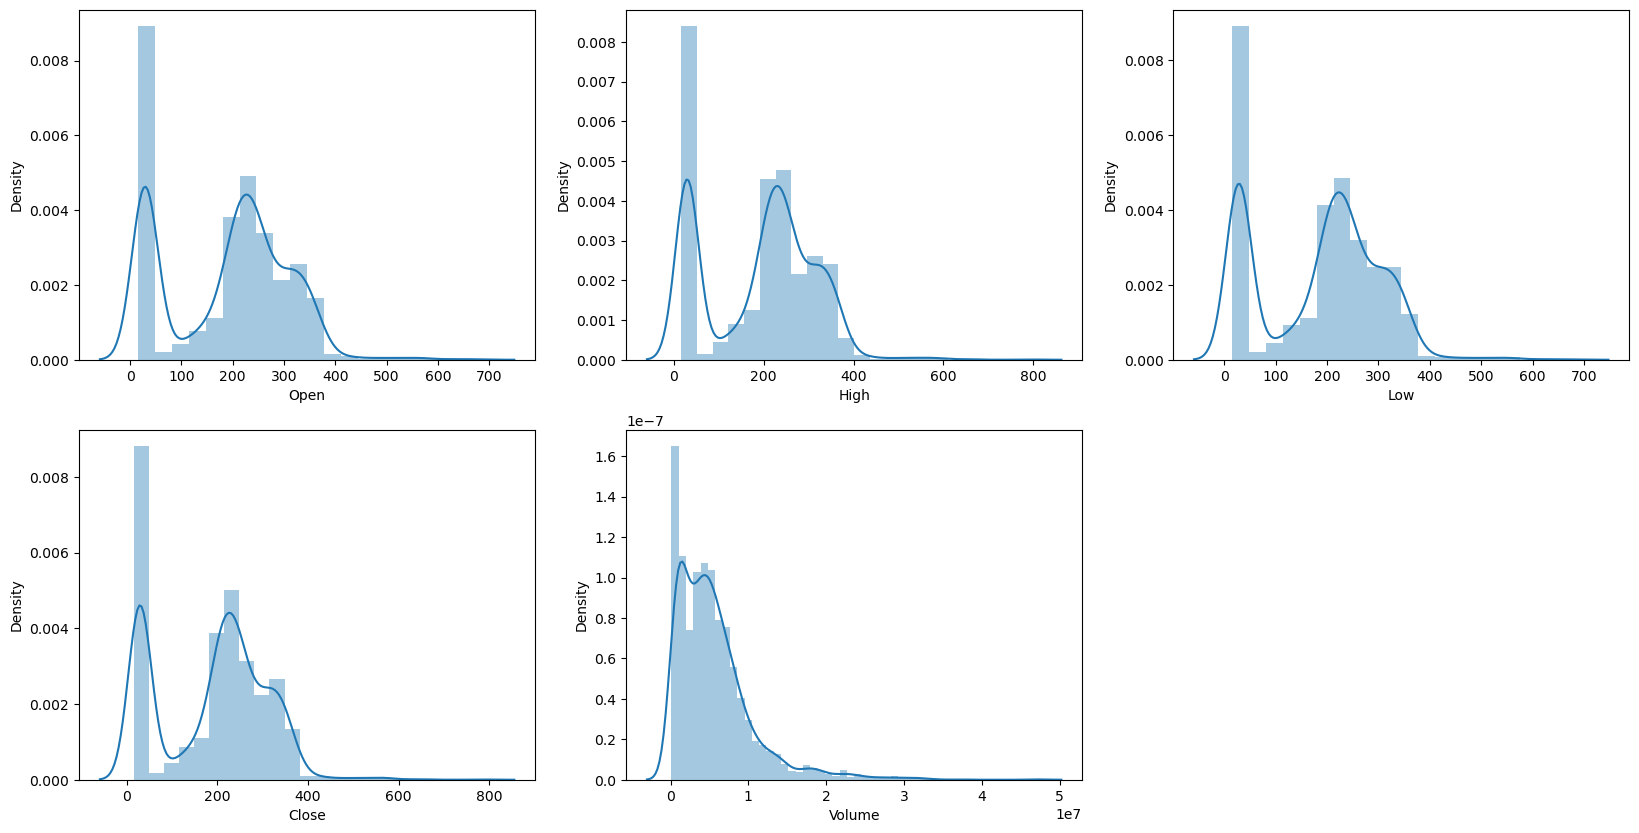

In [11]:
# Display subplot for every axis
#In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly
#in two regions. #And the Volume data is left-skewed

features = ('Open', 'High', 'Low', 'Close', 'Volume')
plt.subplots(figsize = (20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()    

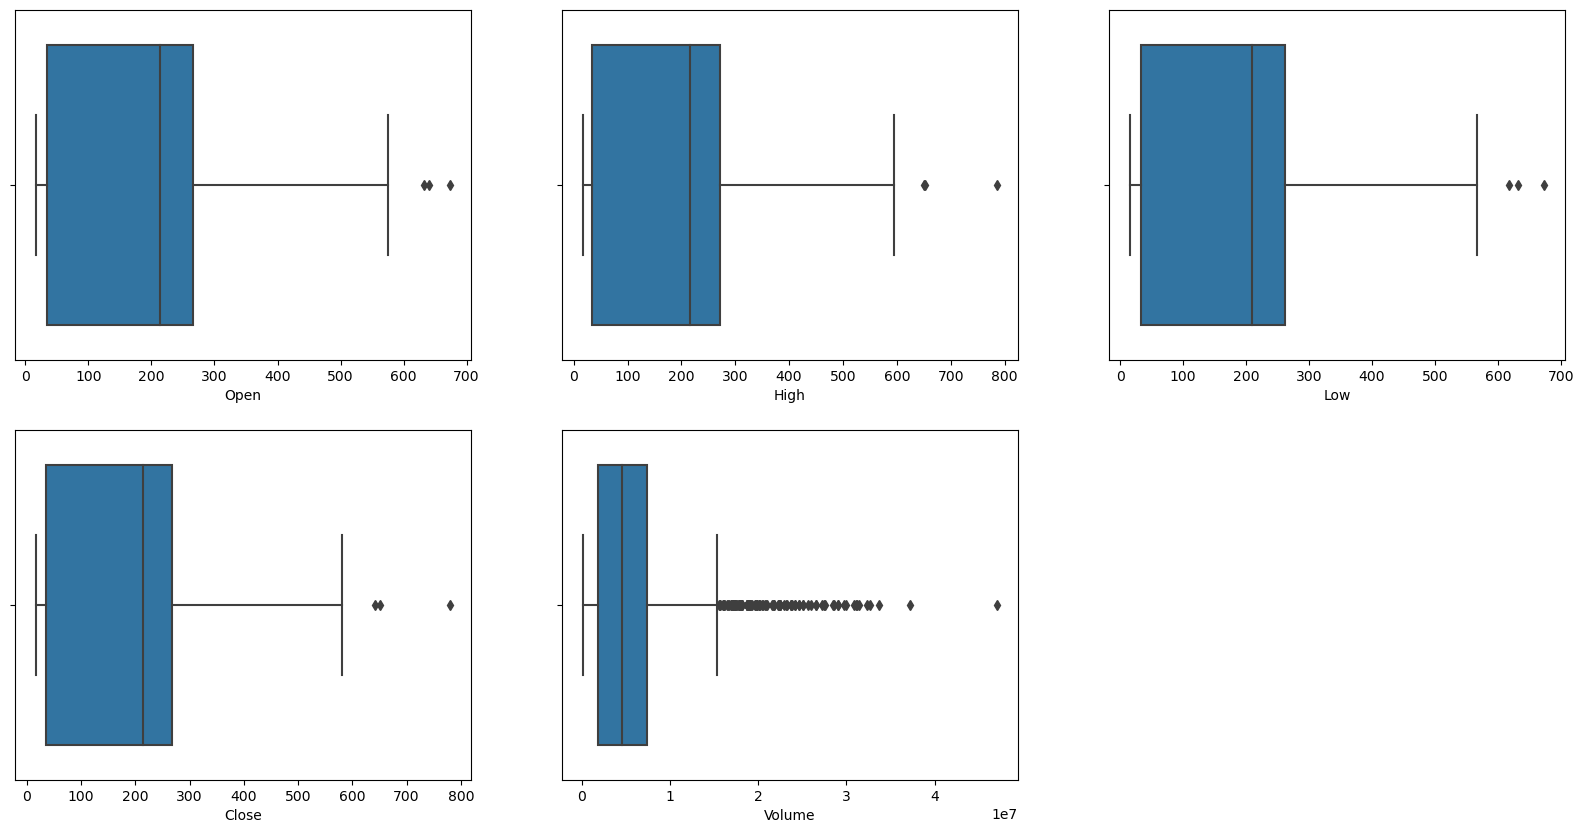

In [12]:
# Display for boxplot
#From the boxplots, we can conclude that only volume data contains outliers in it but 
#the data in the rest of the columns are free from any outlier.

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


In [13]:
# Feature Engineering(Deriving valuable features from the existing ones)
# Splitting date into day, month and year

splitted = df['Date'].str.split('/', expand = True)

day = df['day'] = splitted[2].astype(int)
month = df['month'] = splitted[1].astype(int)
year = df['year'] = splitted[0].astype(int)

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010/06/29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010/06/30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010/07/01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010/07/02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010/07/06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [14]:
# Quarterly result is a helpful feature for learning the result since they affect stock prices heavily

df['quaterly_result'] = np.where(df['month'] % 3 == 0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,quaterly_result
0,2010/06/29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010/06/30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010/07/01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010/07/02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010/07/06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


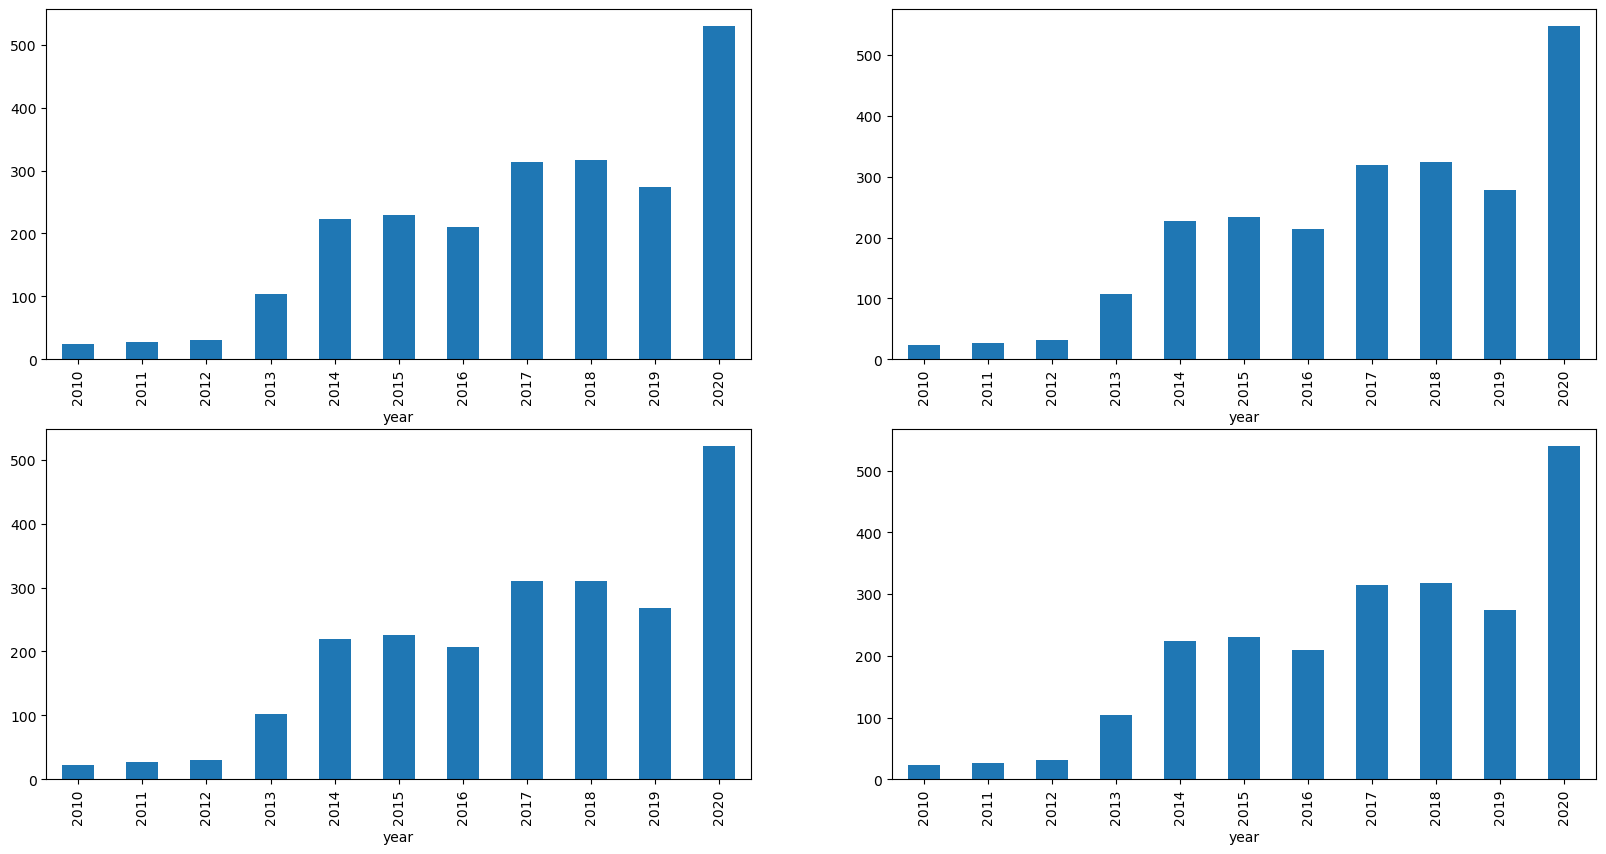

In [15]:
#Bar Graph
#From the bar graph, we can conclude that the stock prices have doubled from the year 2013 to that in 2014.

data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [16]:
#Here are some of the important observations of the below-grouped data:

#Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
#The volume of trades is lower in the months which are quarter end.

df.groupby('quaterly_result').mean()

,Open,High,Low,Close,Volume,day,month,year
quaterly_result,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


In [17]:
#we have added some more columns which will help in the training of our model. 
#We have added the target feature which is a signal whether to buy or not 
#we will train our model to predict this only. 

df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'],1,0)

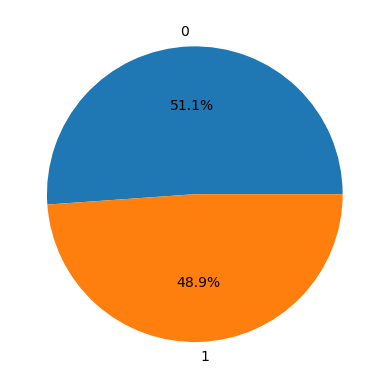

In [18]:
#Pie Chart
#When we add features to our dataset we have to ensure that there are no highly correlated
#features as they do not help in the learning process of the algorithm.

plt.pie(df['target'].value_counts().values, labels=[0,1], autopct = '%1.1f%%')
plt.show()

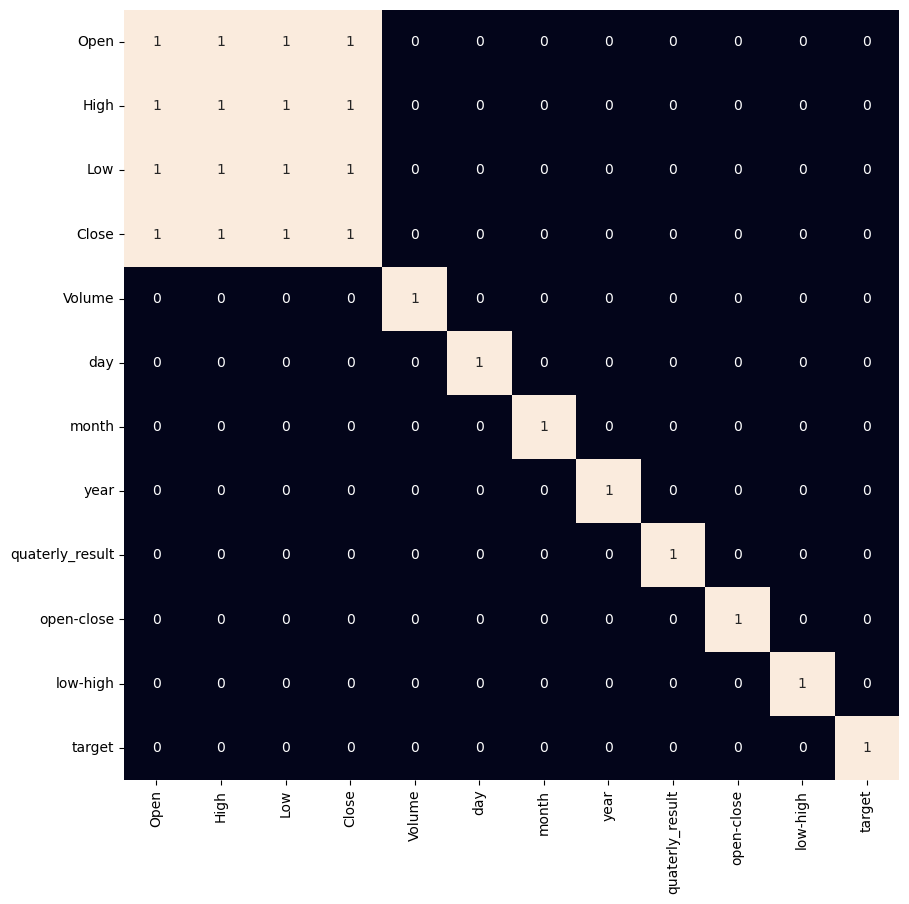

In [19]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [20]:
#From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, 
#and the added features are not highly correlated with each other or previously provided features 
#which means that we are good to go and build our model

In [21]:
# Data Splitting and Normalization

#After selecting the features to train the model on we should normalize the data because normalized data leads to 
#stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio 
#so, that we can evaluate the performance of our model on unseen data.

features = df[['open-close', 'low-high', 'quaterly_result']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2174, 3) (242, 3)


In [22]:
# Model Development and Evaluation

models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5294572363547078
Validation Accuracy :  0.4625068418171866

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Accuracy :  0.968013309795654
Validation Acc

In [23]:
#Model Development and Evaluation
#Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting 
#as the difference between the training and the validation accuracy is too high. 
#But in the case of the Logistic Regression, this is not the case.

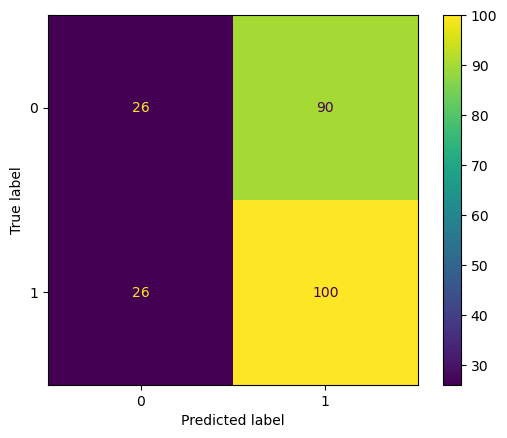

In [24]:
# Now let’s plot a confusion matrix for the validation data.

metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()


In [ ]:
#Conclusion:
#We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing 
#with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to 
#perform such a complex task as Stock Market prediction.